In [77]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [78]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [79]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [80]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [81]:



df = getQuotes(frameM30, 2023, 10)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1696204800,1.05683,1.05693,1.05675,1.05675,147,39,0
1,1696206600,1.05675,1.05675,1.05630,1.05659,297,39,0
2,1696208400,1.05661,1.05691,1.05607,1.05633,7590,9,0
3,1696210200,1.05634,1.05638,1.05574,1.05588,1008,9,0
4,1696212000,1.05589,1.05612,1.05574,1.05607,781,9,0
...,...,...,...,...,...,...,...,...
235,1696627800,1.05974,1.05991,1.05899,1.05929,1834,9,0
236,1696629600,1.05930,1.05939,1.05883,1.05939,1889,9,0
237,1696631400,1.05939,1.05958,1.05886,1.05893,1554,9,0
238,1696633200,1.05893,1.05894,1.05823,1.05841,969,9,0


In [82]:


def gopalKrishnanRangeIndex(df, lookBackPeriod=5):
    df['HighestHigh'] = df['high'].rolling(window=lookBackPeriod).max()
    df['LowestLow'] = df['low'].rolling(window=lookBackPeriod).min()
    df['Delta'] = abs(df['HighestHigh'] - df['LowestLow'])
    df['GRI'] = np.log(df['Delta']) / np.log(lookBackPeriod)
    return df

def ema(df, lookBackPeriod=20):
    df['EMA'] = ta.ema(df['close'], length=lookBackPeriod)
    return df



In [83]:

lookBackPeriod=5
emaLookBackPeriod=20

df = gopalKrishnanRangeIndex(df, lookBackPeriod)
df = ema(df, emaLookBackPeriod)

df = df.dropna()

df



,time,open,high,low,close,tick_volume,spread,real_volume,HighestHigh,LowestLow,Delta,GRI,EMA
19,1696239000,1.05682,1.05893,1.05678,1.05892,3349,9,0,1.05893,1.05598,0.00295,-3.619866,1.056705
20,1696240800,1.05892,1.05915,1.05784,1.05831,4111,9,0,1.05915,1.05598,0.00317,-3.575176,1.056858
21,1696242600,1.05832,1.05876,1.05709,1.05719,3057,9,0,1.05915,1.05598,0.00317,-3.575176,1.056889
22,1696244400,1.05718,1.05778,1.05613,1.05667,3193,9,0,1.05915,1.05605,0.00310,-3.589050,1.056869
23,1696246200,1.05668,1.05677,1.05595,1.05618,2170,9,0,1.05915,1.05595,0.00320,-3.569323,1.056803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1696627800,1.05974,1.05991,1.05899,1.05929,1834,9,0,1.05991,1.05760,0.00231,-3.771819,1.056577
236,1696629600,1.05930,1.05939,1.05883,1.05939,1889,9,0,1.05991,1.05768,0.00223,-3.793718,1.056845
237,1696631400,1.05939,1.05958,1.05886,1.05893,1554,9,0,1.05991,1.05796,0.00195,-3.877084,1.057044
238,1696633200,1.05893,1.05894,1.05823,1.05841,969,9,0,1.05991,1.05823,0.00168,-3.969685,1.057174


In [84]:



def ohlcPlot(df):
    plt.figure(figsize=(14, 6))
    for i in range(len(df)):
        if (df.iloc[i]['GRI'] == df.iloc[i - 1]['GRI']):
            plt.vlines(x=i,ymin=df.iloc[i]['low'],ymax=df.iloc[i]['high'],color='black',linewidth=1)
            plt.vlines(x=i,ymin=df.iloc[i]['close'],ymax=df.iloc[i]['open'],color='black',linewidth=1)
        elif (df.iloc[i]['GRI'] != df.iloc[i - 1]['GRI']) and (df.iloc[i]['close'] > df.iloc[i]['EMA']):
            plt.vlines(x=i,ymin=df.iloc[i]['low'],ymax=df.iloc[i]['high'],color='green',linewidth=1)
            plt.vlines(x=i,ymin=df.iloc[i]['open'],ymax=df.iloc[i]['close'],color='green',linewidth=1)
        elif (df.iloc[i]['GRI'] != df.iloc[i - 1]['GRI']) and (df.iloc[i]['close'] < df.iloc[i]['EMA']):
            plt.vlines(x=i,ymin=df.iloc[i]['low'],ymax=df.iloc[i]['high'],color='red',linewidth=1)
            plt.vlines(x=i,ymin=df.iloc[i]['close'],ymax=df.iloc[i]['open'],color='red',linewidth=1)
    plt.grid()
    plt.show()




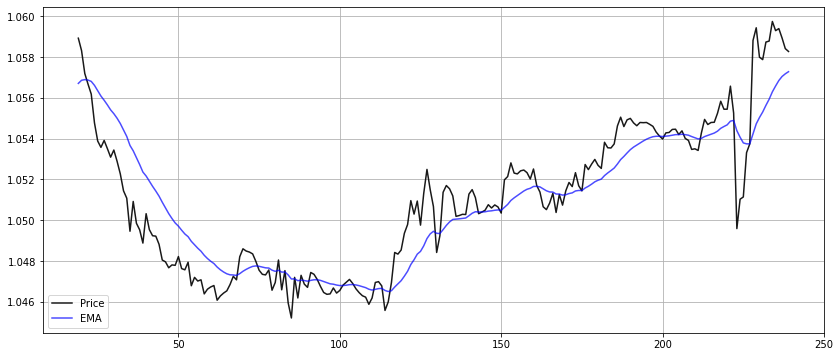

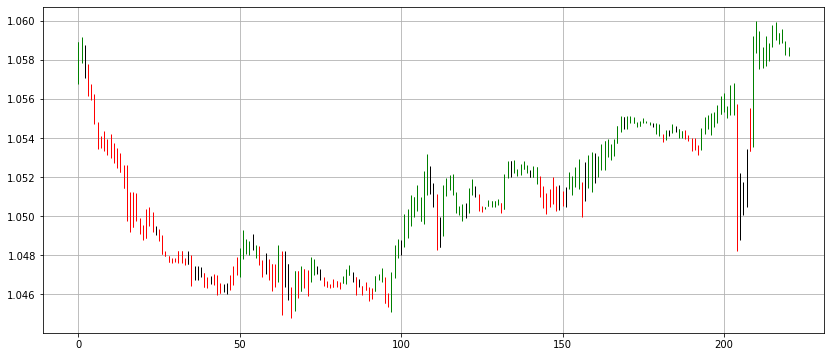

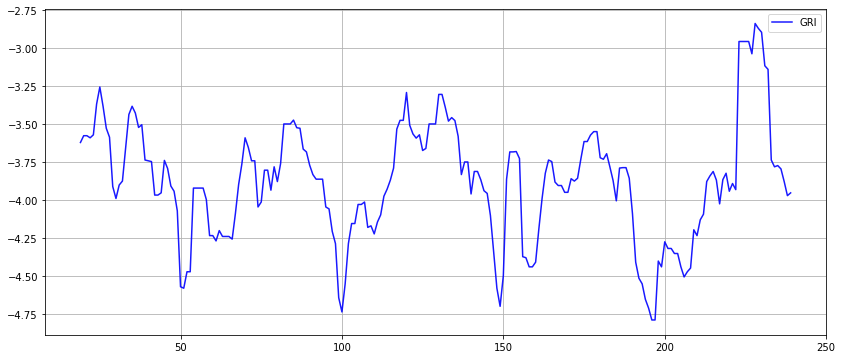

In [85]:


plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.plot(df['EMA'], label='EMA', color='blue', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

ohlcPlot(df)

plt.figure(figsize=(14, 6))
plt.plot(df['GRI'], label='GRI', color='blue', alpha=0.9)
plt.legend()
plt.grid(True)
plt.show()

